# Exploring Temporal Trends in Job Market using PySpark
This notebook conducts a comprehensive temporal analysis of job market data using PySpark, leveraging its powerful time series functionality. The primary aim is to uncover hidden insights and discernible patterns within the dynamic job market landscape over time.

## Notebook Breakdown
- Importing Required Resources: All essential resources are imported to facilitate the analysis. Since the installation of resources has already been completed in the previous data processing notebook, we proceed directly to importing them.

- Data Loading and Visualization: The processed data, saved as "processed_job_descriptions.csv" in the file directory, is loaded using PySpark. Utilizing PySpark DataFrame operations, an initial overview of the data is obtained to ensure data integrity and completeness.

- Temporal Analysis: PySpark's time-series functionalities are harnessed to analyze trends over time on a yearly, monthly, weekly, and  daily basis.

  - Yearly Analysis: For the yearly analysis, trends in job postings aggregated annually are examined. Year-over-year changes are analyzed to identify overarching patterns and shifts in job market activity, providing insights into long-term trends.

  - Monthly Analysis: In the monthly analysis, variations in job postings month by month are explored. Seasonal patterns, peak hiring periods, and potential fluctuations influenced by economic conditions and industry trends are uncovered, offering a granular view of job market dynamics.

  - Weekly Analysis: The weekly analysis dissects job postings on a weekly basis to identify short-term fluctuations, spikes, and dips in job market activity. Weekly hiring patterns and responses to specific events or campaigns are scrutinized to optimize recruitment efforts.

  - Daily Analysis: Daily fluctuations in job postings are scrutinized to identify immediate changes in job market dynamics and responses to external stimuli. The impact of short-term events on job market activity is assessed to adapt recruitment strategies and capitalize on emerging opportunities.

Through this exploration using PySpark, the project aims to equip stakeholders with actionable insights and a comprehensive understanding essential for navigating the complex dynamics of the modern job market landscape.

## Importing Required Libraires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import findspark
from pyspark.sql.functions import col, when

findspark.init()

from pyspark.sql import SparkSession 
spark = SparkSession.builder.appName('Name').config('config_option', 'value').getOrCreate()

import warnings

warnings.filterwarnings("ignore")

24/04/06 23:50:09 WARN Utils: Your hostname, Pujas-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.97 instead (on interface en0)
24/04/06 23:50:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/06 23:50:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/06 23:50:10 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/04/06 23:50:10 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


## Data Loading and Visualization

In [2]:
df = spark.read.option('inferSchema', True).csv('processed_job_descriptions.csv', header=True)
df.limit(1).toPandas()

,Qualifications,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Job Title,...,Job Description,Benefits,skills,Responsibilities,Company,Company Profile,Min Salary,Max Salary,Min Exp,Max Exp
0,M.Tech,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,Female,Digital Marketing Specialist,...,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"""{""""Sector"""":""""Diversified""""",59000,99000,5,15


In [3]:
df.printSchema()

root
 |-- Qualifications: string (nullable = true)
 |-- location: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- Work Type: string (nullable = true)
 |-- Company Size: integer (nullable = true)
 |-- Job Posting Date: date (nullable = true)
 |-- Preference: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Role: string (nullable = true)
 |-- Job Portal: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- skills: string (nullable = true)
 |-- Responsibilities: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Company Profile: string (nullable = true)
 |-- Min Salary: integer (nullable = true)
 |-- Max Salary: integer (nullable = true)
 |-- Min Exp: integer (nullable = true)
 |-- Max Exp: integer (nullable = true)



### Yearly Analysis

+-----------+--------+
|PostingYear|JobCount|
+-----------+--------+
|       2023|  570838|
|       2022|  806158|
|       2021|  238944|
+-----------+--------+



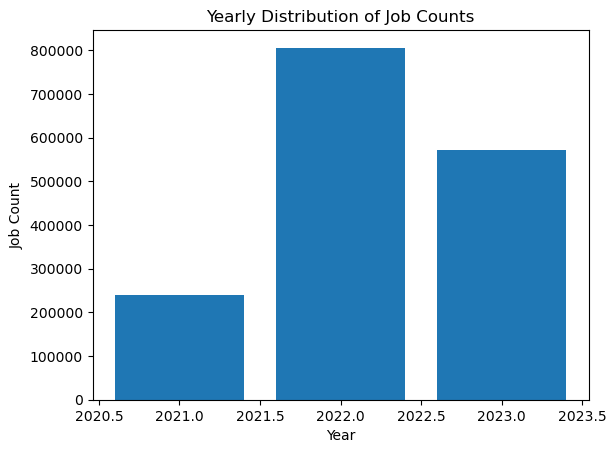

In [4]:
from pyspark.sql.functions import col, count, year, month

df = df.withColumn("PostingYear", year(col("Job Posting Date")))
yearly_job_count = df.groupBy("PostingYear").agg(count("*").alias("JobCount"))

yearly_job_count.show()
y_df = yearly_job_count

# Collecting data to the driver node
yearly_data = yearly_job_count.collect()

# Sorting the data based on PostingYear
sorted_yearly_data = sorted(yearly_data, key=lambda x: x['PostingYear'])

# Extracting PostingYear and JobCount
years = [row['PostingYear'] for row in sorted_yearly_data]
counts = [row['JobCount'] for row in sorted_yearly_data]

# Plotting the histogram
plt.bar(years, counts)
plt.xlabel('Year')
plt.ylabel('Job Count')
plt.title('Yearly Distribution of Job Counts')
plt.savefig('yearly_job_counts.png')
plt.show()

The table presents the total count of job postings for each year, showcasing the aggregate job market activity over the specified period. In 2022, the highest number of job postings is recorded, totaling 806,158, indicating a robust job market during that year. Following closely is the year 2023, with a substantial number of job postings amounting to 570,838, suggesting continued activity and demand in the job market. However, 2021 exhibits a comparatively lower count of job postings, totaling 238,944, implying a potential slowdown or reduced activity in the job market during that year. This disparity in job counts across the years underscores the dynamic nature of the job market, influenced by various factors such as economic conditions, industry trends, and societal changes. Analyzing these trends can provide valuable insights into the evolving landscape of employment opportunities and workforce dynamics.

### Monthly Analysis

+-----------+------------+--------+
|PostingYear|PostingMonth|JobCount|
+-----------+------------+--------+
|2023       |9           |33315   |
|2023       |8           |68540   |
|2023       |7           |68579   |
|2023       |6           |66465   |
|2023       |5           |69000   |
|2023       |4           |66122   |
|2023       |3           |68399   |
|2023       |2           |61864   |
|2023       |1           |68554   |
|2022       |12          |68711   |
|2022       |11          |66072   |
|2022       |10          |68513   |
|2022       |9           |66174   |
|2022       |8           |67945   |
|2022       |7           |69015   |
|2022       |6           |66257   |
|2022       |5           |68364   |
|2022       |4           |66328   |
|2022       |3           |68722   |
|2022       |2           |61334   |
|2022       |1           |68723   |
|2021       |12          |68519   |
|2021       |11          |66492   |
|2021       |10          |68726   |
|2021       |9           |35

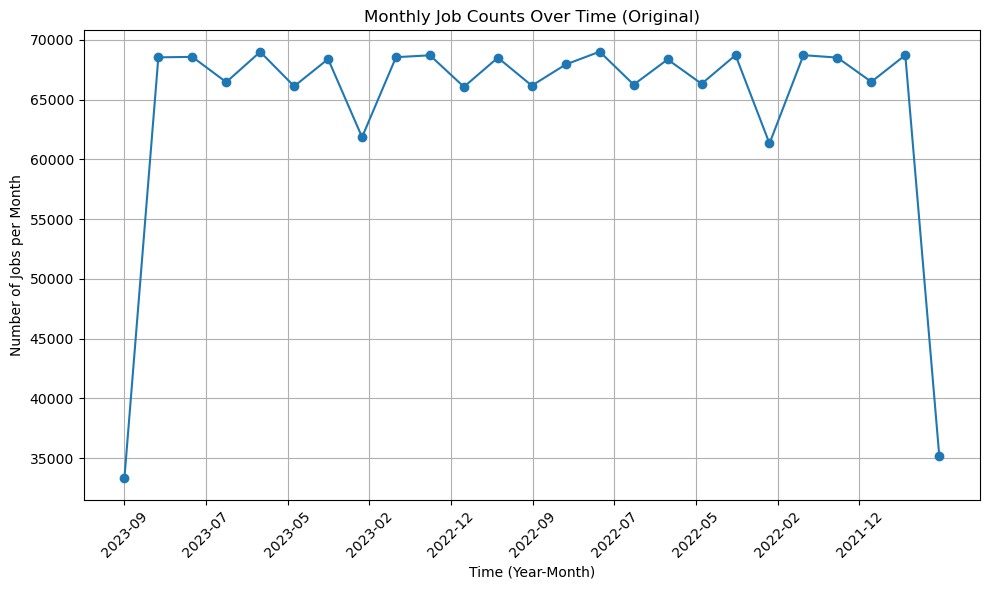

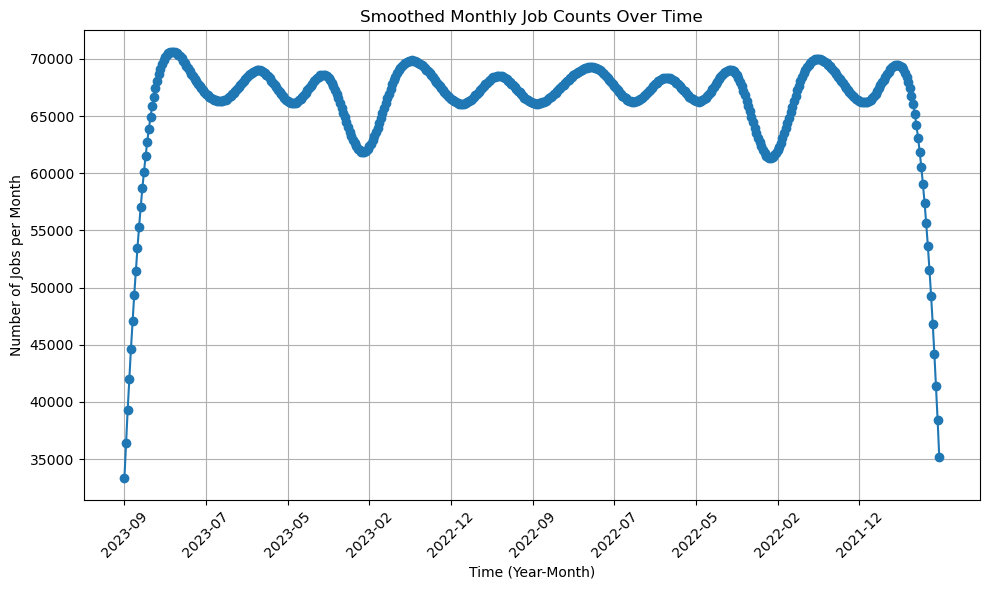

In [5]:
from pyspark.sql.functions import desc, month
from scipy.interpolate import interp1d

# Calculate monthly job counts
df = df.withColumn("PostingMonth", month(col("Job Posting Date")))
monthly_job_count = df.groupBy("PostingYear", "PostingMonth").agg(count("*").alias("JobCount"))

# Sorting the monthly job count data in reverse chronological order (latest first)
reverse_sorted_monthly_job_count = monthly_job_count.orderBy(desc("PostingYear"), desc("PostingMonth"))
reverse_sorted_monthly_job_count.show(reverse_sorted_monthly_job_count.count(), truncate=False)

# Extracting PostingYear, PostingMonth, and JobCount
monthly_data = reverse_sorted_monthly_job_count.collect()
time_periods = [f"{row['PostingYear']}-{row['PostingMonth']:02d}" for row in monthly_data]
job_counts = [row['JobCount'] for row in monthly_data]

# Create an array of indices for the time periods
x = np.arange(len(time_periods))

# Interpolate the data for smoothness
f_smooth = interp1d(x, job_counts, kind='cubic')   
x_new = np.linspace(0, len(time_periods) - 1, 500)  
y_smooth = f_smooth(x_new)                

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(x, job_counts, marker='o', linestyle='-')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Jobs per Month')
plt.title('Monthly Job Counts Over Time (Original)')
plt.xticks(x_new[::50], [time_periods[int(idx)] for idx in x_new[::50]], rotation=45)  # Adjust x-axis ticks
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_smooth, marker='o', linestyle='-')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Jobs per Month')
plt.title('Smoothed Monthly Job Counts Over Time')
plt.xticks(x_new[::50], [time_periods[int(idx)] for idx in x_new[::50]], rotation=45)  # Adjust x-axis ticks
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_job_counts.png')
plt.show()

The monthly analysis illustrates monthly job posting counts across different years all over the world, revealing fluctuations in job market activity. On thing is common in this timeframe that in February, number of jobs posted had decreased for both 2022 and 2023. In 2023, consistent postings are observed throughout the year, with peaks in July (68,579) and May (69,000). However, there's a decline in postings in February (61,864) and September (33,315), suggesting potential seasonal influences or industry-specific trends. Similarly, 2022 shows consistent activity, with notable peaks in July (69,015) and December (68,711), while 2021 exhibits similar patterns, except for a significant drop in September (35,207). It's worth noting that incomplete data may explain the lack of changes in mid-September, underscoring the importance of considering data integrity when interpreting trends.

### Weekly Analysis

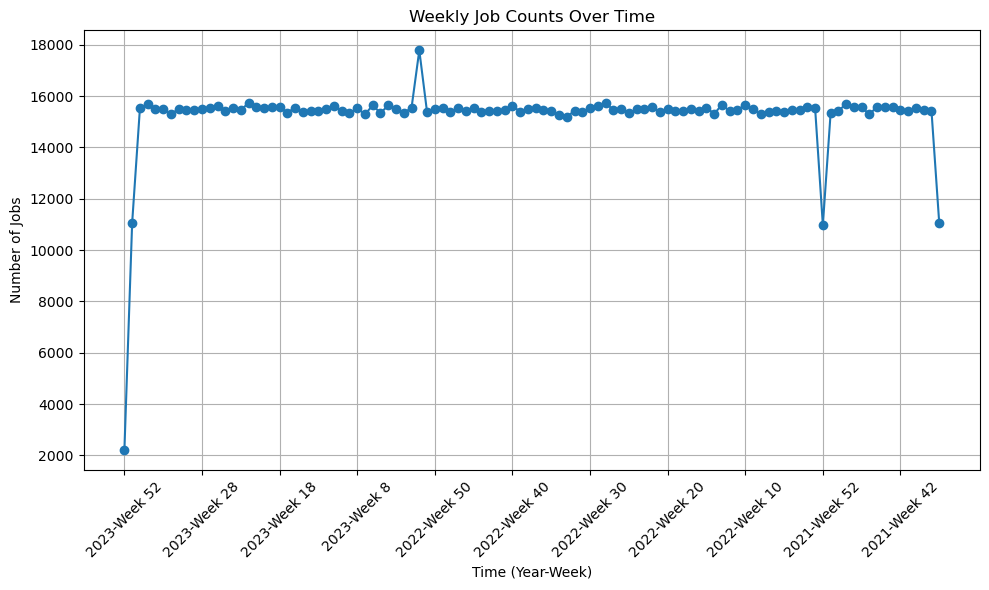

+-----------+-----------+--------+
|PostingYear|PostingWeek|JobCount|
+-----------+-----------+--------+
|2023       |52         |2205    |
|2023       |37         |11063   |
|2023       |36         |15521   |
|2023       |35         |15696   |
|2023       |34         |15481   |
|2023       |33         |15511   |
|2023       |32         |15289   |
|2023       |31         |15503   |
|2023       |30         |15437   |
|2023       |29         |15441   |
|2023       |28         |15484   |
|2023       |27         |15526   |
|2023       |26         |15595   |
|2023       |25         |15425   |
|2023       |24         |15522   |
|2023       |23         |15447   |
|2023       |22         |15736   |
|2023       |21         |15564   |
|2023       |20         |15531   |
|2023       |19         |15564   |
|2023       |18         |15563   |
|2023       |17         |15356   |
|2023       |16         |15545   |
|2023       |15         |15391   |
|2023       |14         |15411   |
|2023       |13     

In [6]:
# Import necessary functions and modules
from pyspark.sql.functions import col, count, weekofyear, year, desc
import matplotlib.pyplot as plt

# Assuming df is already defined as a PySpark DataFrame with 'Job Posting Date' column
# Extract year from 'Job Posting Date'
df = df.withColumn("PostingYear", year(col("Job Posting Date")))

# Calculate weekly job counts
df = df.withColumn("PostingWeek", weekofyear(col("Job Posting Date")))
weekly_job_count = df.groupBy("PostingYear", "PostingWeek").agg(count("*").alias("JobCount"))

# Sorting the weekly job count data in reverse chronological order (latest first)
reverse_sorted_weekly_job_count = weekly_job_count.orderBy(desc("PostingYear"), desc("PostingWeek"))

# Collecting weekly job count data
weekly_data = reverse_sorted_weekly_job_count.collect()
time_periods_weekly = [f"{row['PostingYear']}-Week {row['PostingWeek']}" for row in weekly_data]
job_counts_weekly = [row['JobCount'] for row in weekly_data]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(time_periods_weekly, job_counts_weekly, marker='o', linestyle='-')
plt.xlabel('Time (Year-Week)')
plt.ylabel('Number of Jobs')
plt.title('Weekly Job Counts Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(time_periods_weekly[::10])  # Adjust x-axis ticks interval
plt.tight_layout()
plt.savefig('weekly_job_counts.png')
plt.show()

# Displaying the sorted weekly job count data
reverse_sorted_weekly_job_count.show(reverse_sorted_weekly_job_count.count(), truncate=False)


The table depicts weekly job posting counts categorized by year and week number, highlighting fluctuations in recruitment activity. Noteworthy are two downward spikes, observed in Week 37 of 2021 (11,037 postings) and Week 52 of 2021 (10,976 postings), deviating from the average of approximately 15,000 postings per week. These declines indicate potential decreases in hiring activity during those periods. In contrast, an upward spike is evident in Week 52 of 2022 (17,781 postings), suggesting a period of heightened job posting activity. Additionally, missing data points for certain weeks in 2023, particularly after Week 37, raise the possibility of gaps or reduced job posting frequency during those periods.

### Daily Analysis

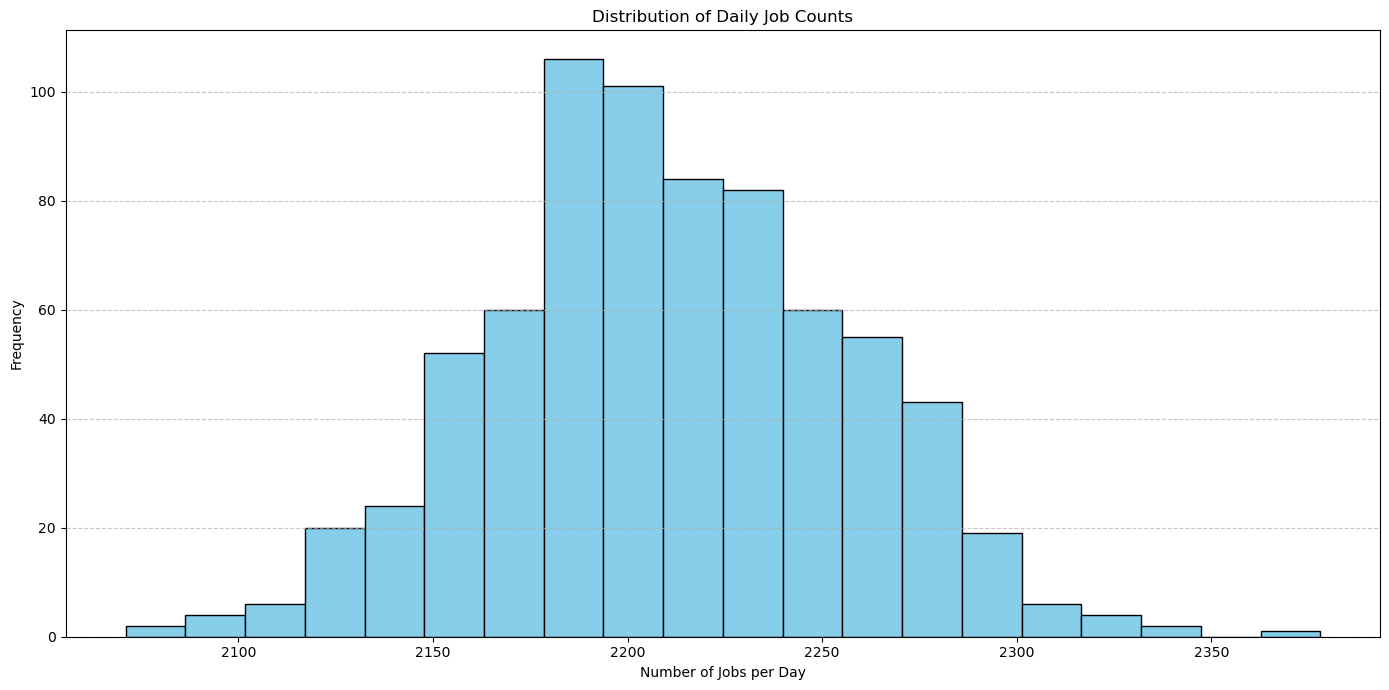

+-----------+----------------+--------+
|PostingYear|PostingDayOfYear|JobCount|
+-----------+----------------+--------+
|2023       |258             |2202    |
|2023       |257             |2272    |
|2023       |256             |2218    |
|2023       |255             |2140    |
|2023       |254             |2231    |
|2023       |253             |2271    |
|2023       |252             |2214    |
|2023       |251             |2268    |
|2023       |250             |2159    |
|2023       |249             |2204    |
|2023       |248             |2261    |
|2023       |247             |2144    |
|2023       |246             |2271    |
|2023       |245             |2187    |
|2023       |244             |2273    |
|2023       |243             |2229    |
|2023       |242             |2287    |
|2023       |241             |2237    |
|2023       |240             |2212    |
|2023       |239             |2238    |
|2023       |238             |2200    |
|2023       |237             |2201    |


In [7]:
from pyspark.sql.functions import dayofyear

# Calculate daily job counts
df = df.withColumn("PostingDayOfYear", dayofyear(col("Job Posting Date")))
daily_job_count = df.groupBy("PostingYear", "PostingDayOfYear").agg(count("*").alias("JobCount"))

# Sorting the daily job count data in reverse chronological order (latest first)
reverse_sorted_daily_job_count = daily_job_count.orderBy(desc("PostingYear"), desc("PostingDayOfYear"))

# Extracting PostingYear, PostingDayOfYear, and JobCount
daily_data = reverse_sorted_daily_job_count.collect()
time_periods_daily = [f"{row['PostingYear']}-Day {row['PostingDayOfYear']}" for row in daily_data]
job_counts_daily = [row['JobCount'] for row in daily_data]

# Create an array of indices for the time periods
x_daily = np.arange(len(time_periods_daily))

# Plot the original data using a histogram
plt.figure(figsize=(14, 7))
plt.hist(job_counts_daily, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Jobs per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Job Counts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('daily_job_counts.png')
plt.show()

# Display the sorted daily job counts
reverse_sorted_daily_job_count.show(reverse_sorted_daily_job_count.count(), truncate=False)

The histogram portraying daily job counts demonstrates a consistent trend throughout the dataset, with the lowest job count per day hovering around 2100 and the highest reaching approximately 2400 job postings. Of particular significance is the prominent peak frequency observed around the 2200 mark, indicating that this count represents the most prevalent number of job postings per day.